# Implementation of HED in Pytorch
---


In [1]:
# import torch libraries
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import os
import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import utility functions
from model import HED
from trainer import Trainer
from dataproc import BSDSDataset

In [2]:
# fix random seed
rng = np.random.RandomState(37148)

# GPU ID
gpuID = 1

### Preprocess and Setup Data

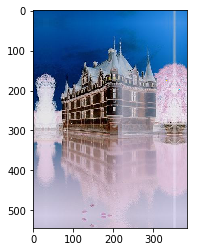

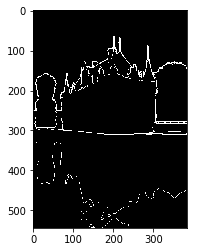

[ 0.39866447 -0.01170184 -0.64404315] [ 1.46812844  0.96944726  0.88216442]


In [3]:
# load the images dataset
dataRoot = 'data/HED-BSDS/'
testPath = dataRoot+'test.lst'
trainPath = dataRoot+'train_pair.lst'

rootDir = dataRoot
frame = pd.read_csv(trainPath, dtype=str, delimiter=' ')

# check some sample images
idx = 5

# input and target images
inputName = os.path.join(rootDir, frame.iloc[idx, 0])
targetName = os.path.join(rootDir, frame.iloc[idx, 1])        

# process the images
inputImage = io.imread(inputName)
inputImage = inputImage.astype(np.float32)
inputImage = inputImage[:,:,::-1]

targetImage = io.imread(targetName, as_grey=True)
targetImage = targetImage > 0
targetImage = targetImage.astype(np.float32)

plt.figure()
plt.imshow(inputImage)
plt.show()

plt.figure()
plt.imshow(targetImage,cmap=cm.gray)
plt.show()

inputImage -= np.array((104.00698793,116.66876762,122.67891434))
inputImage /= 255*np.array((0.225, 0.224, 0.229))
print(inputImage.mean(axis=(0,1)), inputImage.std(axis=(0,1)))

inputImage = inputImage.transpose((2,0,1))
inputImage = np.expand_dims(inputImage, axis=0)
inputImage = torch.from_numpy(np.flip(inputImage, axis=0).copy())

targetImage = np.expand_dims(targetImage, axis=0)        
targetImage = np.expand_dims(targetImage, axis=0)        
targetImage = torch.from_numpy(targetImage)

### Train the Network

In [ ]:
# batch size
nBatch = 1

# load the images dataset
dataRoot = 'data/HED-BSDS/'
valPath = dataRoot+'val_pair.lst'
trainPath = dataRoot+'train_pair.lst'

# create data loaders from dataset
valDataset = BSDSDataset(valPath, dataRoot)
trainDataset = BSDSDataset(trainPath, dataRoot)

valDataloader = DataLoader(valDataset, batch_size=nBatch)
trainDataloader = DataLoader(trainDataset, batch_size=nBatch)

In [ ]:
# initialize the network
net = HED()
net.cuda(gpuID)

# define the optimizer
optimizer = optim.SGD(net.parameters(), lr=1e-5, momentum=0.9, weight_decay=0.0002)

# initialize trainer class
trainer = Trainer(net, optimizer, trainDataloader, valDataloader, cuda=True, gpuID=gpuID)

# train the network
trainer.train()

1e-05
2017-10-11 07:39:46 epoch: 0 iter:99 loss:7.421687
  loss1: 0.695 max1:1.0000 min1:0.0000
  loss2: 1.207 max2:1.0000 min2:0.0000
  loss3: 1.855 max3:1.0000 min3:0.0000
  loss4: 1.376 max4:1.0000 min4:0.0000
  loss5: 0.539 max5:1.0000 min5:0.0000
  loss6: 1.750 max6:1.0000 min6:0.0000
2017-10-11 07:39:53 epoch: 0 iter:199 loss:2.958183
  loss1: 0.321 max1:1.0000 min1:0.0000
  loss2: 0.510 max2:1.0000 min2:0.0000
  loss3: 0.814 max3:1.0000 min3:0.0000
  loss4: 0.462 max4:1.0000 min4:0.0000
  loss5: 0.194 max5:1.0000 min5:0.0000
  loss6: 0.656 max6:1.0000 min6:0.0000
2017-10-11 07:40:00 epoch: 0 iter:299 loss:4.636522
  loss1: 0.470 max1:1.0000 min1:0.0000
  loss2: 0.812 max2:1.0000 min2:0.0000
  loss3: 1.228 max3:1.0000 min3:0.0000
  loss4: 0.643 max4:1.0000 min4:0.0000
  loss5: 0.374 max5:1.0000 min5:0.0000
  loss6: 1.110 max6:1.0000 min6:0.0000
2017-10-11 07:40:08 epoch: 0 iter:399 loss:5.635306
  loss1: 0.672 max1:1.0000 min1:0.0000
  loss2: 1.001 max2:1.0000 min2:0.0000
  loss3

2017-10-11 07:42:35 epoch: 0 iter:2999 loss:1.510616
  loss1: 0.374 max1:1.0000 min1:0.0000
  loss2: 0.311 max2:1.0000 min2:0.0000
  loss3: 0.163 max3:1.0000 min3:0.0000
  loss4: 0.089 max4:0.9932 min4:0.0001
  loss5: 0.095 max5:0.8326 min5:0.0218
  loss6: 0.477 max6:1.0000 min6:0.0000
Evaluation:
evaluate done
2017-10-11 07:42:42 epoch: 0 iter:3099 loss:2.712379
  loss1: 0.649 max1:1.0000 min1:0.0000
  loss2: 0.744 max2:1.0000 min2:0.0000
  loss3: 0.290 max3:1.0000 min3:0.0000
  loss4: 0.211 max4:0.9410 min4:0.0005
  loss5: 0.255 max5:0.7836 min5:0.0777
  loss6: 0.563 max6:1.0000 min6:0.0000
